---

# Análisis de datos archivo LlamadosLlamadas Haulmer

Por : Christian Vergara Retamal - Benjamín Sánchez Aliste
      

El siguiente archivo fué proporcionado por x perteneciente al equipo/área de x en Haulmer. Los datos dispuestos se obtienen desde el proceso de x con los clientes, en el cuál se detallan las siguientes variables : 

*   Número : 
*   Fecha : 
*   Periodo : 
*   Empresa : 
*   Acción : 
*   Responsable :
*   Estado : 
*   Departamento : 
*   Semana : 
*   Día Semana : 




---

## Aspectos Computacionales

**Librerías utilizadas para el funcionamiento del notebook**

* numpy  versión 1.21.6 : Álgebra lineal y matemáticas
* pandas versión 1.3.5 : Manejo y análisis de estructuras de datos
* seaborn versión 0.11.2 : Visualización de gráficos
* matplotlib 3.2.2 : Gráficos
* Scikit-learn 1.0.2 : Machine Learning

---

## Preparación Ambiente de Trabajo

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

### Importación y observación del set de datos

In [4]:
# Datos de LlamadosLlamadas
data = pd.read_csv("/content/drive/MyDrive/Datos/Datos Tesis/LlamadosLlamadas.csv")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Las columnas del set de datos
data.columns

Index(['ID', 'Número', 'Fecha', 'Periodo', 'Empresa', 'Acción', 'Responsable',
       'Estado', 'Departamento', 'Semana', 'Día Semana'],
      dtype='object')

In [6]:
# Muestra del conjunto de datos
data.sample(5)

,ID,Número,Fecha,Periodo,Empresa,Acción,Responsable,Estado,Departamento,Semana,Día Semana
40579,56966036303 Haulmer - 02/03/2021 11:25:00,56966036303,2/03/2021,01/03/2021,Haulmer,Terminada,Q Ventas,unanswered,Ventas,10,2
37301,56342520807 OpenCloud - 27/02/2021 9:41:49,56342520807,27/02/2021,01/02/2021,OpenCloud,Terminada,IVR,answered,NaN,9,6
73163,56966578566 Haulmer - 22/07/2021 12:11:41,56966578566,22/07/2021,01/07/2021,Haulmer,Terminada,Gabriel Barrios,answered,Ventas,30,4
97591,56954122919 Haulmer - 2/21/2022 12:21:24 PM,56954122919,21/02/2022,01/02/2022,Haulmer,Terminada,Rodrigo Gilles,answered,NaN,9,1
99451,56982282726 Haulmer - 3/14/2022 11:17:07 AM,56982282726,14/03/2022,1/03/2022,Haulmer,Terminada,Juan Vergara,answered,Ventas,12,1


In [7]:
# Cantidad de filas y columnas
print("El dataframe anime consta de {} atributos (columnas) y {} registros (filas)".format(data.shape[1], data.shape[0]))

El dataframe anime consta de 11 atributos (columnas) y 102055 registros (filas)


## Análisis descriptivo

In [8]:
# Cantidad de registros por columna y tipo de dato
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102055 entries, 0 to 102054
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            102055 non-null  object
 1   Número        102055 non-null  object
 2   Fecha         102055 non-null  object
 3   Periodo       102055 non-null  object
 4   Empresa       101883 non-null  object
 5   Acción        102052 non-null  object
 6   Responsable   101912 non-null  object
 7   Estado        102055 non-null  object
 8   Departamento  82112 non-null   object
 9   Semana        102055 non-null  object
 10  Día Semana    102055 non-null  object
dtypes: object(11)
memory usage: 8.6+ MB


In [9]:
# Descripción de los datos numéricos
data.describe()

,ID,Número,Fecha,Periodo,Empresa,Acción,Responsable,Estado,Departamento,Semana,Día Semana
count,102055,102055,102055,102055,101883,102052,101912,102055,82112,102055,102055
unique,61971,32088,468,17,12,8,121,2,1,71,15
top,56998298420 Haulmer - 25/02/2021 12:26:49,56998298420,25/02/2021,01/02/2021,Haulmer,Terminada,Q Ventas,answered,Ventas,9,4
freq,5112,5119,10776,25136,84679,62890,21873,52131,82112,14799,18818


In [10]:
# Descripción de los datos categóricos
data.describe(include = "object")

,ID,Número,Fecha,Periodo,Empresa,Acción,Responsable,Estado,Departamento,Semana,Día Semana
count,102055,102055,102055,102055,101883,102052,101912,102055,82112,102055,102055
unique,61971,32088,468,17,12,8,121,2,1,71,15
top,56998298420 Haulmer - 25/02/2021 12:26:49,56998298420,25/02/2021,01/02/2021,Haulmer,Terminada,Q Ventas,answered,Ventas,9,4
freq,5112,5119,10776,25136,84679,62890,21873,52131,82112,14799,18818


In [11]:
# Verificación de datos nulos por columna
data.isna().sum()

ID                  0
Número              0
Fecha               0
Periodo             0
Empresa           172
Acción              3
Responsable       143
Estado              0
Departamento    19943
Semana              0
Día Semana          0
dtype: int64

## Análisis Univariado de atributos

### Variables numéricas

In [12]:
#Cambiando que las semanas y dias de la semana para que sean numeros, pues son strings y no sirven para analizar
data["Semana"] = data["Semana"].str.replace("#VALUE!", "0")
data['Semana']=pd.to_numeric(data['Semana'])
data["Día Semana"] = data["Día Semana"].str.replace("#VALUE!", "0")
data['Día Semana']=pd.to_numeric(data['Día Semana'])

In [13]:
# Obtención de columnas numéricas del set de datos
columnas_numericas = data.select_dtypes(include = ["float64", "int64"])

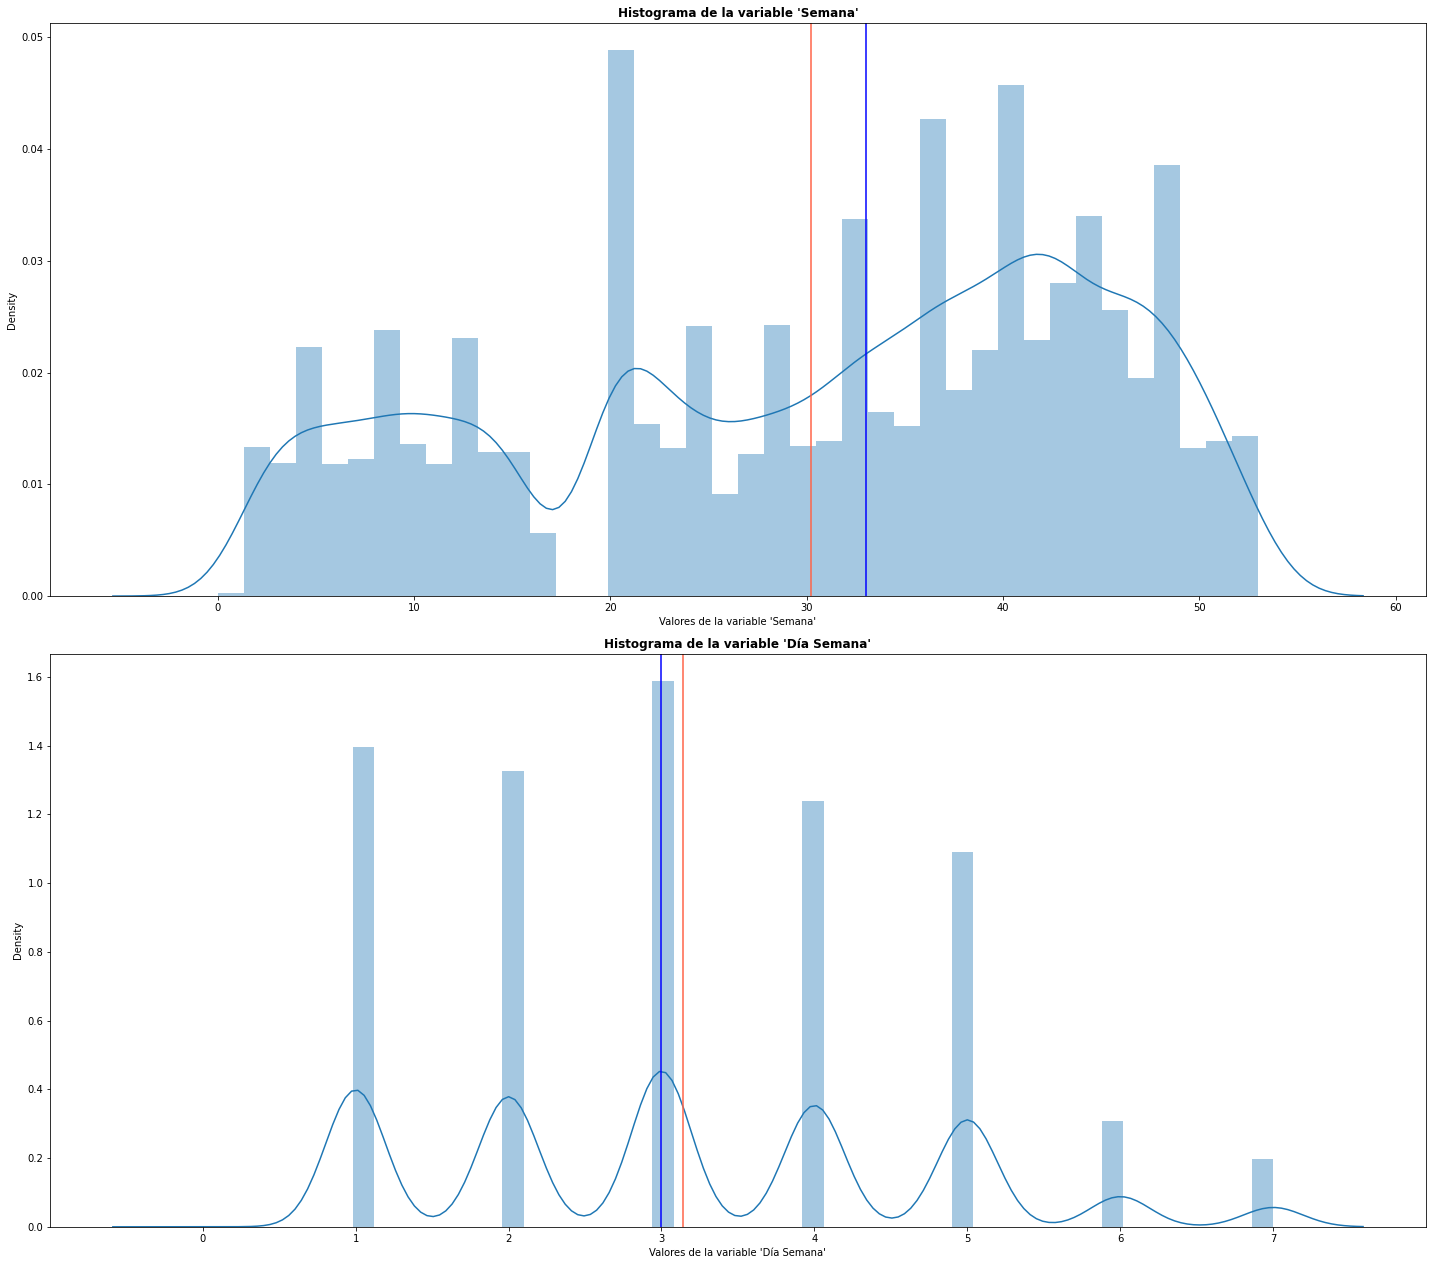

In [14]:
plt.figure(figsize=(20,26))
for index, col in enumerate(columnas_numericas):
    plt.subplot((len(list(columnas_numericas)))+1,1, index+1)
    titulo = str(f"Histograma de la variable '{col}'")
    texto_ejex = str(f"Valores de la variable '{col}'")
    
    if data[col].dtypes == "float64":
        sns.distplot(data[col])
        plt.axvline(data[col].mean(), color='tomato')
        plt.axvline(data[col].median(), color='blue')
        plt.title(titulo, weight='bold')
        plt.xlabel(texto_ejex)
        
    elif data[col].dtypes == "int64":
        sns.distplot(data[col], kde = False, bins = 50)
        plt.axvline(data[col].mean(), color='tomato')
        plt.axvline(data[col].median(), color='blue')
        plt.title(titulo, weight='bold')
        plt.xlabel(texto_ejex)
    plt.tight_layout()

### Variables categóricas

In [15]:
# Creación de función para visualizar frecuencia de valores que puede tomar el respectivo atributo
def plot_freq(df, col): 
  plt.figure(figsize=(10,8))
  aux_dict = df[col].value_counts().to_dict()
  y = list(aux_dict.values())
  plt.barh(*zip(*aux_dict.items()))
  for index, value in enumerate(y):
    plt.text(value, index, str(value))
  plt.title("Frecuencia de la columnas {}".format(col))
  plt.show()
  plt.tight_layout()

#### Atributo "Empresa"

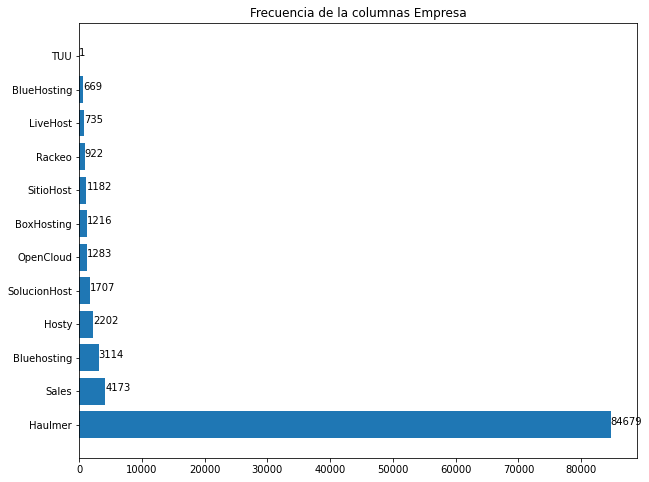

<Figure size 432x288 with 0 Axes>

In [16]:
plot_freq(data, "Empresa")

#### Atributo "Acción"

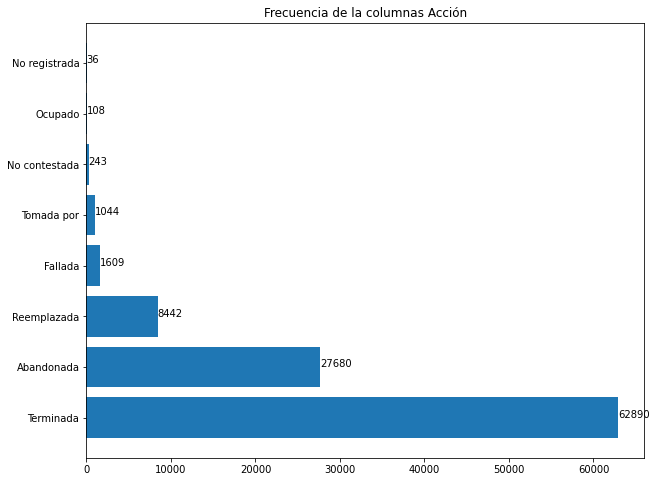

<Figure size 432x288 with 0 Axes>

In [17]:
plot_freq(data, "Acción")

#### Atributo "Responsable"

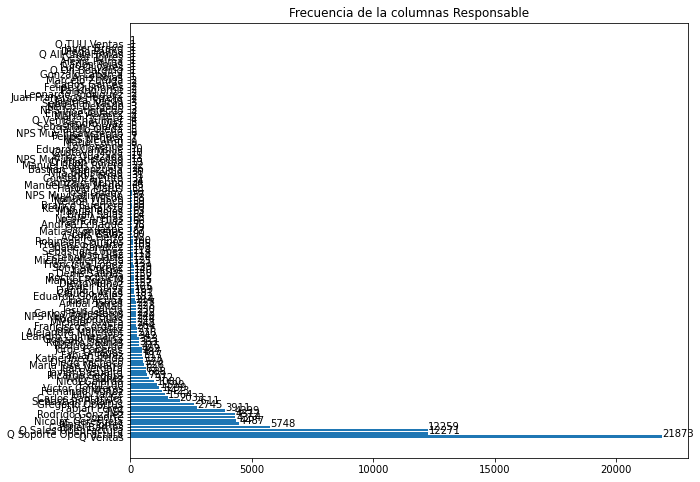

<Figure size 432x288 with 0 Axes>

In [18]:
plot_freq(data, "Responsable")

#### Atributo "Estado"

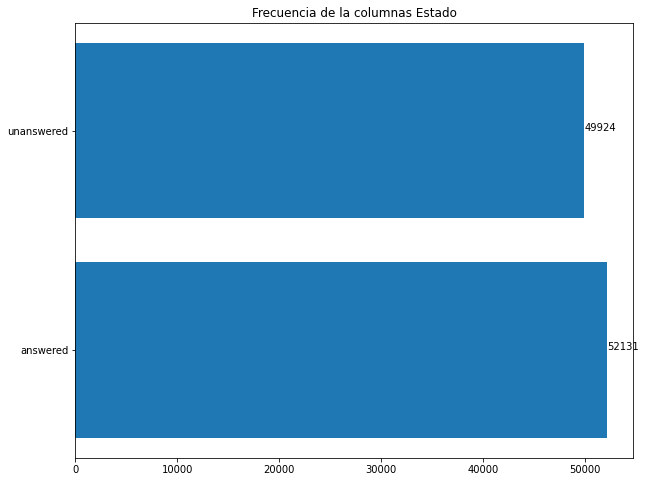

<Figure size 432x288 with 0 Axes>

In [19]:
 plot_freq(data, "Estado")

#### Atributo "Departamento"

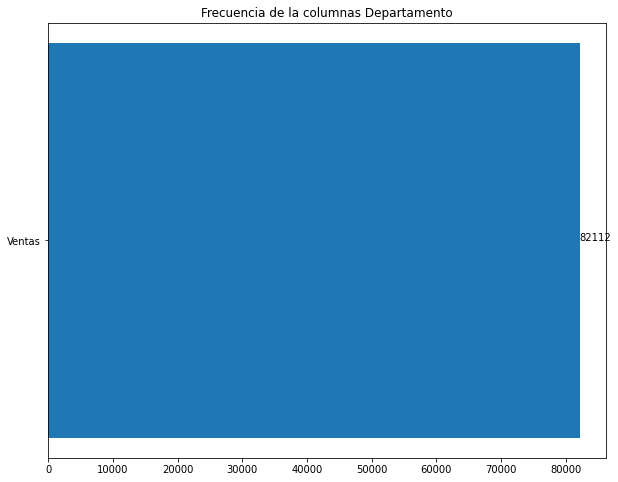

<Figure size 432x288 with 0 Axes>

In [20]:
 plot_freq(data, "Departamento")